In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

<ipython-input-1-7faee6df6c29>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
type(dateparse)

function

In [3]:
time_1 = pd.read_csv("case_time_series.csv",
                   parse_dates=['Date_YMD'], index_col='Date_YMD',
                   date_parser=dateparse)
time_1.head()

<ipython-input-2-978fa4e7b097>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date_YMD,,,,,,,
2020-01-30,30 January 2020,1,1,0,0,0,0
2020-01-31,31 January 2020,0,1,0,0,0,0
2020-02-01,1 February 2020,0,1,0,0,0,0
2020-02-02,2 February 2020,1,2,0,0,0,0
2020-02-03,3 February 2020,1,3,0,0,0,0


In [4]:
time_1.loc['2020-03-01']

Date               1 March 2020
Daily Confirmed               0
Total Confirmed               3
Daily Recovered               0
Total Recovered               3
Daily Deceased                0
Total Deceased                0
Name: 2020-03-01 00:00:00, dtype: object

In [5]:
time_1.iloc[92]

Date               1 May 2020
Daily Confirmed          2396
Total Confirmed         37262
Daily Recovered           962
Total Recovered         10021
Daily Deceased             77
Total Deceased           1231
Name: 2020-05-01 00:00:00, dtype: object

In [6]:
time=time_1.iloc[92:,:]

In [7]:
time.shape

(356, 7)

In [8]:
time.iloc[304]

Date               1 March 2021
Daily Confirmed           12270
Total Confirmed        11124248
Daily Recovered           12472
Total Recovered        10796873
Daily Deceased               92
Total Deceased           156695
Name: 2021-03-01 00:00:00, dtype: object

In [9]:
daily_confirmed_df=time["Daily Confirmed"]

In [10]:
daily_confirmed_df.shape

(356,)

In [11]:
daily_confirmed_df[335]

81398

In [12]:
daily_confirmed_df.describe()

count       356.000000
mean      44634.943820
std       45046.601378
min        2396.000000
25%       14972.500000
50%       32345.000000
75%       61785.000000
max      315735.000000
Name: Daily Confirmed, dtype: float64

In [13]:
daily_confirmed_df.head()

Date_YMD
2020-05-01    2396
2020-05-02    2564
2020-05-03    2952
2020-05-04    3656
2020-05-05    2971
Name: Daily Confirmed, dtype: int64

In [14]:
daily_confirmed_df.shape

(356,)

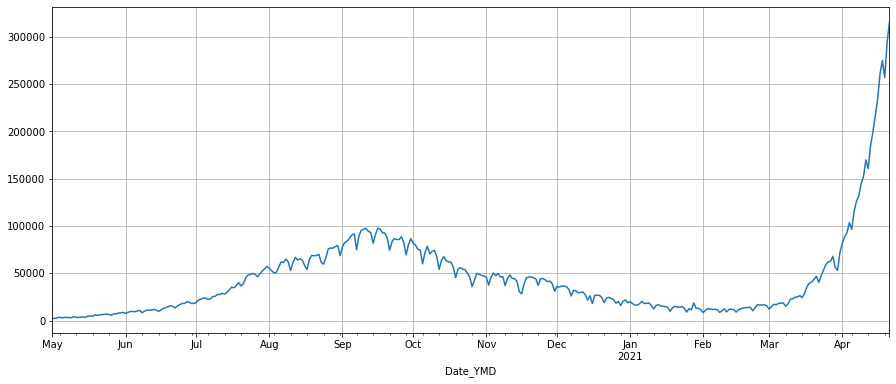

In [15]:
daily_confirmed_df.plot(grid=True) #Overall slight upward trend

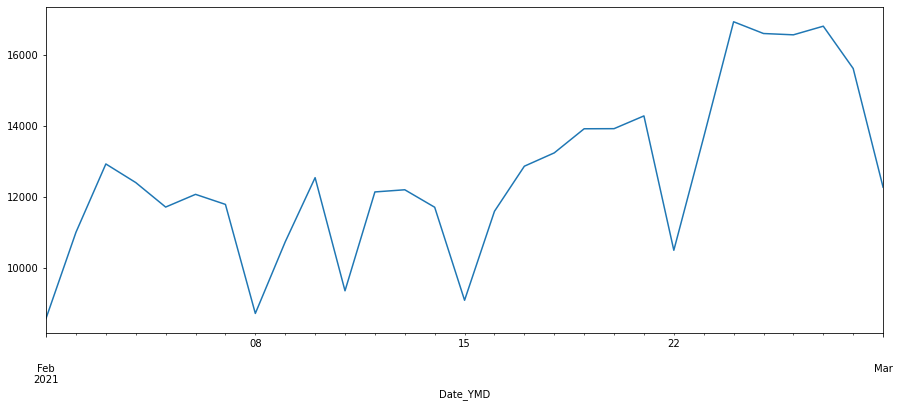

In [16]:
#analysing 2 months data
from datetime import datetime
start=datetime(2021,2,1)
end=datetime(2021,3,1)
daily_confirmed_df[(start<=daily_confirmed_df.index) & (daily_confirmed_df.index<=end)].plot()

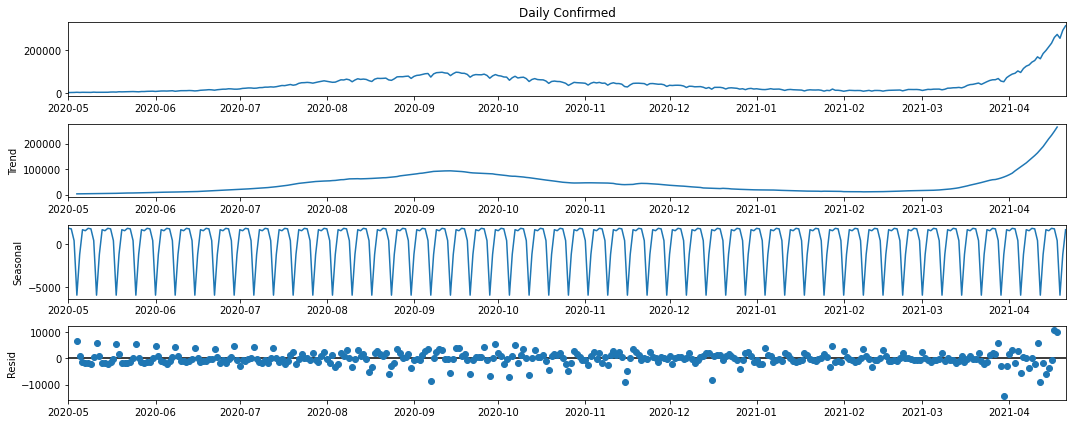

In [17]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_confirmed_df,model='additive')
fig=decomposition.plot()

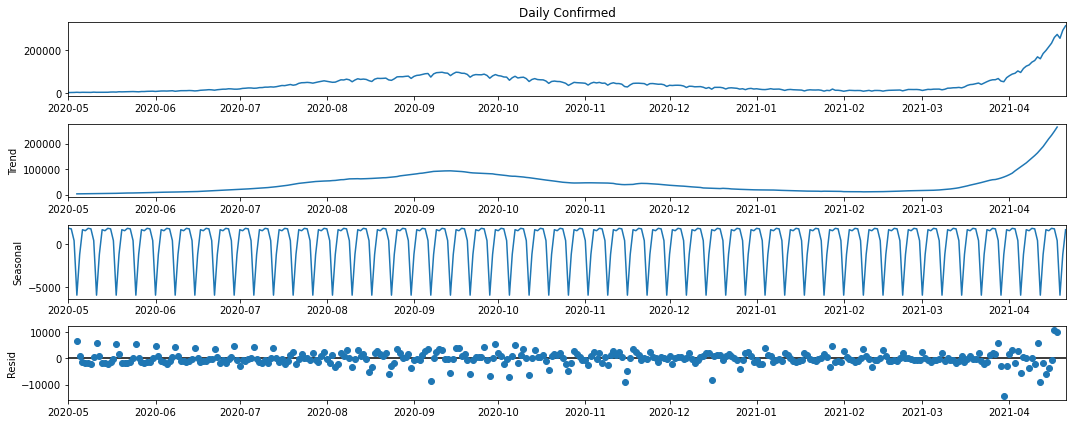

In [18]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_confirmed_df,model='Multiplicative')
fig=decomposition.plot()

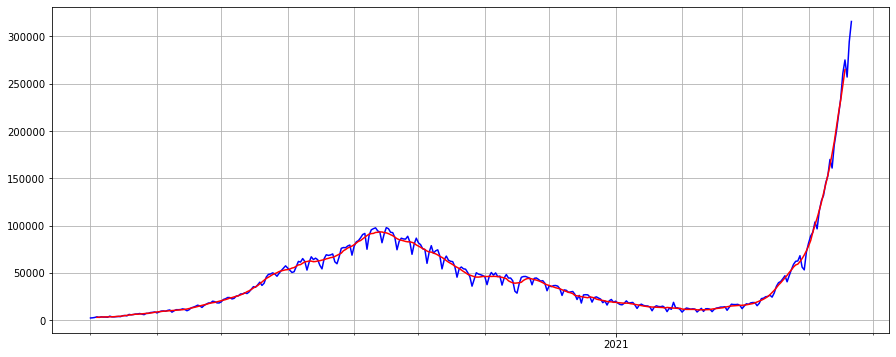

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(daily_confirmed_df.index, daily_confirmed_df, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [20]:
daily_confirmed_df.shape

(356,)

In [21]:
train=daily_confirmed_df[20:336] 
test=daily_confirmed_df[336:]

In [22]:
train.tail()

Date_YMD
2021-03-28    68206
2021-03-29    56152
2021-03-30    53237
2021-03-31    72113
2021-04-01    81398
Name: Daily Confirmed, dtype: int64

In [23]:
test.tail()

Date_YMD
2021-04-17    260895
2021-04-18    275063
2021-04-19    257003
2021-04-20    294365
2021-04-21    315735
Name: Daily Confirmed, dtype: int64

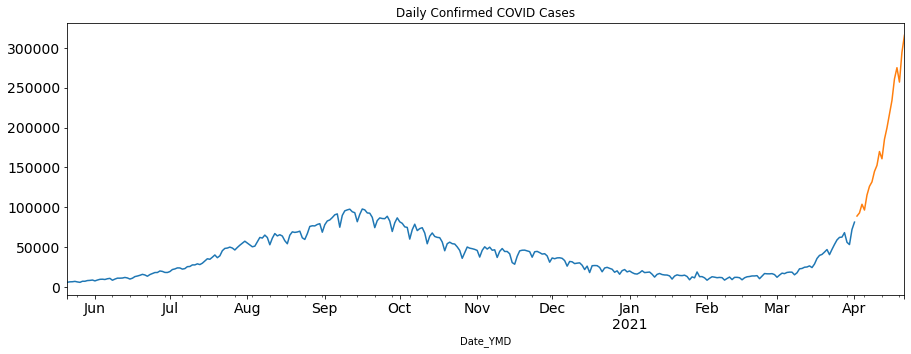

In [24]:
train.plot(figsize=(15,5), title= 'Daily Confirmed COVID Cases', fontsize=14)
test.plot(figsize=(15,5), title= 'Daily Confirmed COVID Cases', fontsize=14)
plt.show()

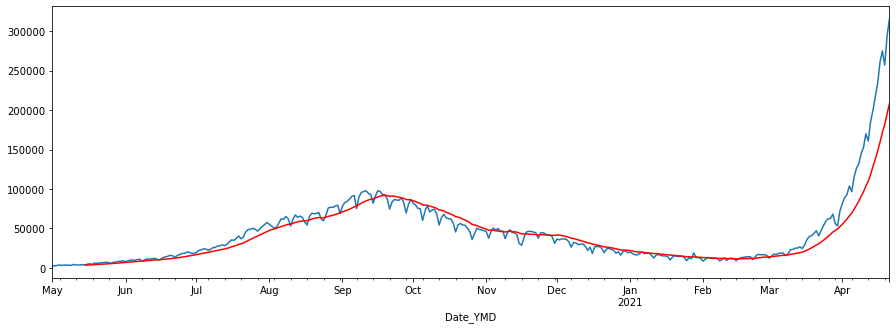

In [25]:

moving_avg =daily_confirmed_df.rolling(15).mean()
daily_confirmed_df.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

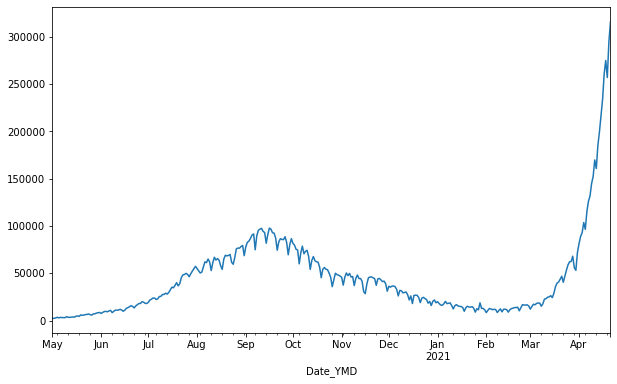

In [26]:
daily_confirmed_df.plot(kind="line",figsize=(10,6))

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [28]:
#SimpleExpSmoothing is used when data doesnt follow trend and seasonality
train= train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(62)
ses.summary()

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,SimpleExpSmoothing,SSE,6473159307.175
Optimized:,True,AIC,5323.919
Trend:,None,BIC,5331.431
Seasonal:,None,AICC,5324.048
Seasonal Periods:,None,Date:,"Wed, 18 Aug 2021"
Box-Cox:,False,Time:,18:21:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8493816,alpha,True
initial_level,6031.8385,l.0,True


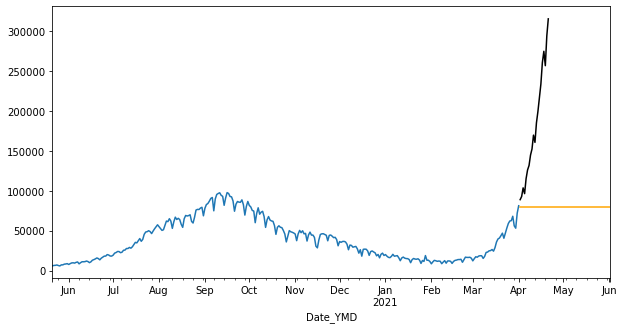

In [29]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [30]:
hes = ExponentialSmoothing(train, trend='mul').fit()
hes.summary()

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,ExponentialSmoothing,SSE,6441577938.410
Optimized:,True,AIC,5326.374
Trend:,Multiplicative,BIC,5341.397
Seasonal:,None,AICC,5326.646
Seasonal Periods:,None,Date:,"Wed, 18 Aug 2021"
Box-Cox:,False,Time:,18:21:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4723621,alpha,True
smoothing_slope,0.0693481,beta,True


In [31]:
hes1 = hes.forecast(62)

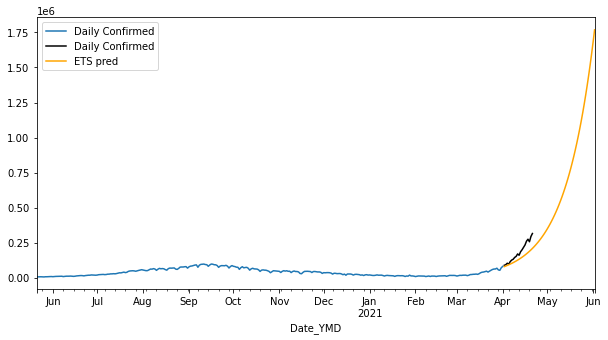

In [32]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [33]:
hwes = ExponentialSmoothing(train, seasonal_periods=3,trend='mul', seasonal="Multiplicative").fit()
hwes.summary()

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,ExponentialSmoothing,SSE,6406603977.280
Optimized:,True,AIC,5330.654
Trend:,Multiplicative,BIC,5356.944
Seasonal:,Multiplicative,AICC,5331.242
Seasonal Periods:,3,Date:,"Wed, 18 Aug 2021"
Box-Cox:,False,Time:,18:21:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5055544,alpha,True
smoothing_slope,0.0653124,beta,True


In [34]:
hwes = ExponentialSmoothing(train, seasonal_periods=3,trend='mul', seasonal="Multiplicative").fit()
hwes.summary()

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,ExponentialSmoothing,SSE,6406603977.280
Optimized:,True,AIC,5330.654
Trend:,Multiplicative,BIC,5356.944
Seasonal:,Multiplicative,AICC,5331.242
Seasonal Periods:,3,Date:,"Wed, 18 Aug 2021"
Box-Cox:,False,Time:,18:21:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5055544,alpha,True
smoothing_slope,0.0653124,beta,True


In [35]:
hwes = hwes.forecast(50)
print(hwes)

2021-04-02     79649.033710
2021-04-03     84735.609166
2021-04-04     88139.115138
2021-04-05     92706.924184
2021-04-06     98627.407374
2021-04-07    102588.893853
2021-04-08    107905.562583
2021-04-09    114796.666727
2021-04-10    119407.610633
2021-04-11    125595.909247
2021-04-12    133616.760720
2021-04-13    138983.635963
2021-04-14    146186.461957
2021-04-15    155522.274770
2021-04-16    161769.010896
2021-04-17    170152.688791
2021-04-18    181019.041468
2021-04-19    188289.885387
2021-04-20    198048.007423
2021-04-21    210695.821048
2021-04-22    219158.667923
2021-04-23    230516.564405
2021-04-24    245237.896782
2021-04-25    255088.166987
2021-04-26    268308.109516
2021-04-27    285442.899243
2021-04-28    296908.050928
2021-04-29    312295.308659
2021-04-30    332239.224839
2021-05-01    345584.006295
2021-05-02    363493.895083
2021-05-03    386707.473945
2021-05-04    402240.037054
2021-05-05    423086.124253
2021-05-06    450105.403650
2021-05-07    468184

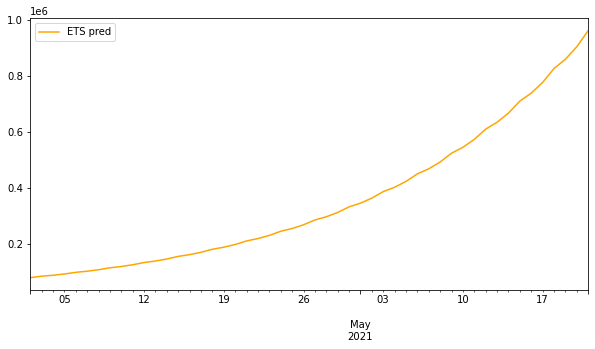

In [36]:
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

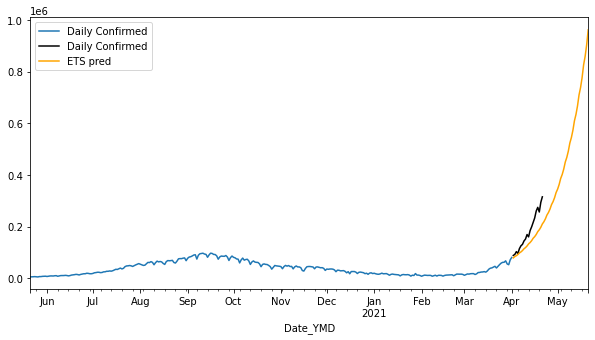

In [37]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

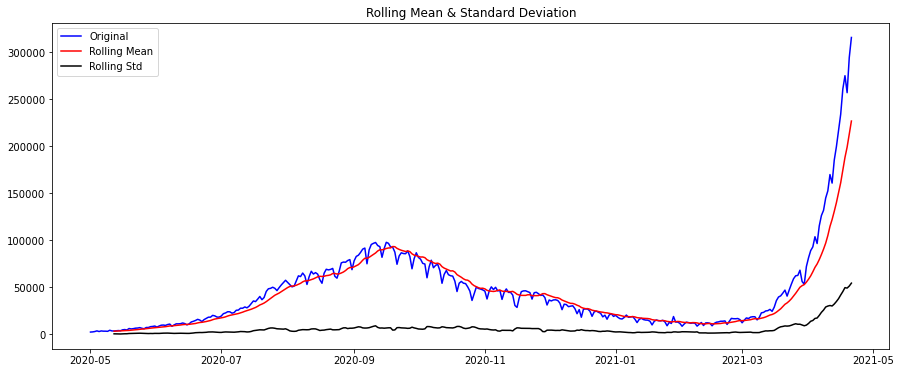

Results of Dickey-Fuller Test:
Test Statistic                  -0.052359
p-value                          0.953982
#Lags Used                      15.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64


In [39]:
test_stationarity(daily_confirmed_df)

In [40]:
diff1=train.diff()
diff1=diff1.dropna()

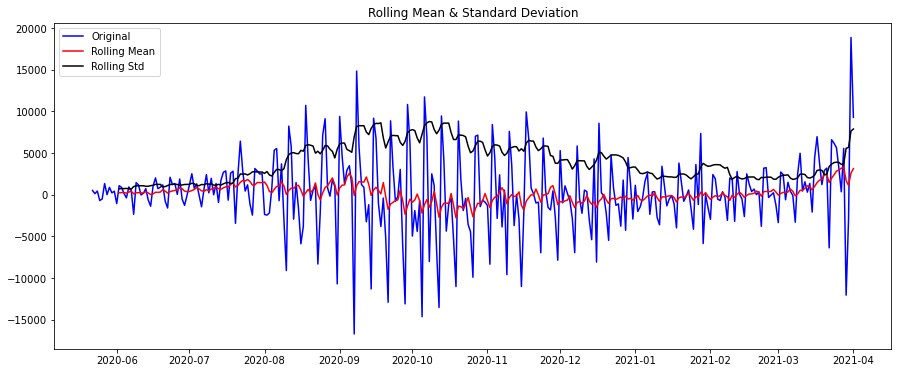

Results of Dickey-Fuller Test:
Test Statistic                  -1.040524
p-value                          0.738199
#Lags Used                      16.000000
Number of Observations Used    298.000000
Critical Value (1%)             -3.452486
Critical Value (5%)             -2.871288
Critical Value (10%)            -2.571964
dtype: float64


In [41]:
test_stationarity(diff1)

In [42]:
diff2=diff1.diff()
diff2=diff2.dropna()

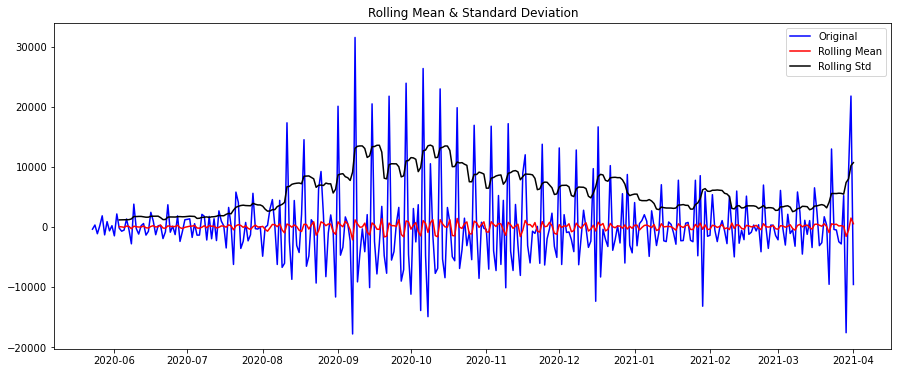

Results of Dickey-Fuller Test:
Test Statistic                -6.411202e+00
p-value                        1.888919e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.980000e+02
Critical Value (1%)           -3.452486e+00
Critical Value (5%)           -2.871288e+00
Critical Value (10%)          -2.571964e+00
dtype: float64


In [43]:
test_stationarity(diff2)

In [44]:
#Autocorelation and partial auto-corelation

In [45]:
from statsmodels.tsa.stattools import acf, pacf

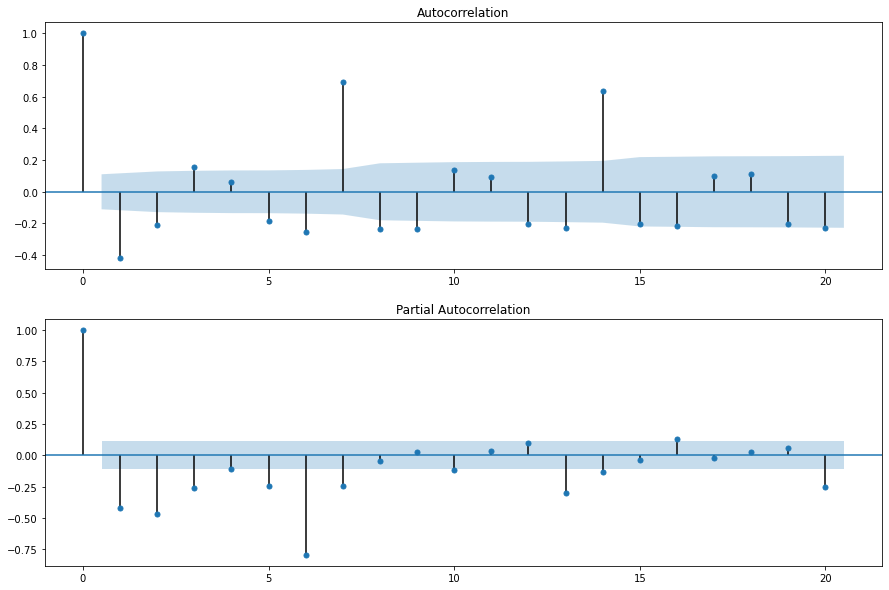

In [46]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=20)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=20)
pyplot.show()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[6]             : AIC=6781.390, Time=1.19 sec
 ARIMA(1,2,0)(1,2,0)[6]             : AIC=6573.005, Time=1.23 sec
 ARIMA(0,2,1)(0,2,1)[6]             : AIC=inf, Time=1.65 sec
 ARIMA(1,2,0)(0,2,0)[6]             : AIC=6629.536, Time=0.15 sec
 ARIMA(1,2,0)(2,2,0)[6]             : AIC=6469.991, Time=1.51 sec
 ARIMA(1,2,0)(2,2,1)[6]             : AIC=6417.637, Time=2.23 sec
 ARIMA(1,2,0)(1,2,1)[6]             : AIC=inf, Time=2.64 sec
 ARIMA(1,2,0)(2,2,2)[6]             : AIC=inf, Time=9.55 sec
 ARIMA(1,2,0)(1,2,2)[6]             : AIC=inf, Time=6.91 sec
 ARIMA(0,2,0)(2,2,1)[6]             : AIC=inf, Time=2.78 sec
 ARIMA(2,2,0)(2,2,1)[6]             : AIC=6326.197, Time=2.43 sec
 ARIMA(2,2,0)(1,2,1)[6]             : AIC=inf, Time=2.87 sec
 ARIMA(2,2,0)(2,2,0)[6]             : AIC=6380.101, Time=2.46 sec
 ARIMA(2,2,0)(2,2,2)[6]             : AIC=inf, Time=7.24 sec
 ARIMA(2,2,0)(1,2,0)[6]             : AIC=6414.182, Time=0.98 sec
 A

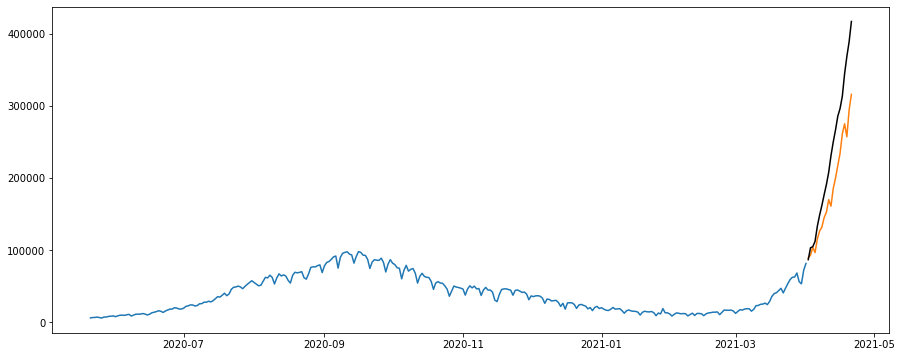

In [50]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=6,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [51]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  316
Model:             SARIMAX(2, 2, 0)x(2, 2, [1], 6)   Log Likelihood               -3157.099
Date:                             Wed, 18 Aug 2021   AIC                           6326.197
Time:                                     18:29:25   BIC                           6348.460
Sample:                                          0   HQIC                          6335.105
                                             - 316                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8393      0.150     -5.609      0.000      -1.133      -0.546
ar.L2         -0.3056      

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
model = ARIMA(train, order=(2,2,0))
model_fit=model.fit(disp=True)
print(model_fit.summary())

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:     D2.Daily Confirmed   No. Observations:                  314
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -3140.657
Method:                       css-mle   S.D. of innovations           5335.034
Date:                Wed, 18 Aug 2021   AIC                           6289.314
Time:                        18:29:28   BIC                           6304.312
Sample:                    05-23-2020   HQIC                          6295.307
                         - 04-01-2021                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       27.9363    144.828      0.193      0.847    -255.922     311.794
ar.L1.D2.Daily Confirmed    -0.6122      0.050    -12.281      0.000      -0.710      -0.

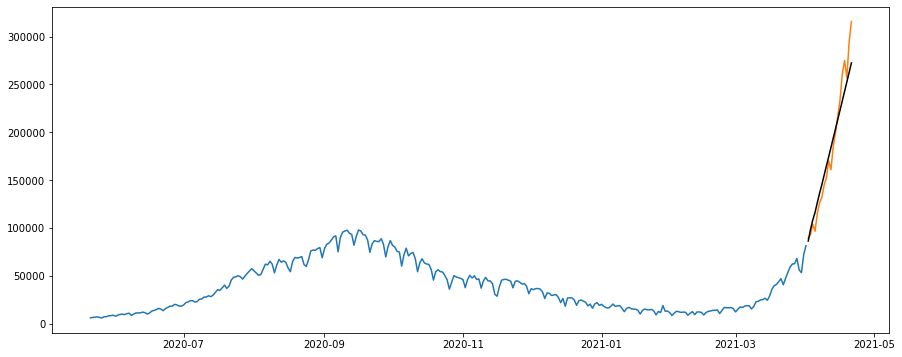

In [54]:
forecast = model_fit.forecast(steps=20)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

14230.163697570615


In [57]:
#ARIMA model gave best results.